# Visualisation des données

## 0. Set Up

### Mise en place de l'environnement

In [1]:
import sqlalchemy
import mysql.connector
import sys
sys.path.insert(0, "/home/apprenant/simplon_projects/american_dream/")
from src.d00_utils.mysql_utils import mysql_connect, save_to_mysql
connect = mysql_connect()

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


### Importation de la table excel depuis sql

In [2]:
excel_data = pd.read_sql("excel_table_v1.0",con=connect)

### Visualisation de la forme de la donnée et des 5 premières lignes


In [3]:
excel_data.shape

(5680, 17)

In [4]:
excel_data.head()


,index,SalaryUSD,Country,PostalCode,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,CompanyEmployeesOverall,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties
0,0,115000.0,United States,03,Full time employee,DBA,No,5,1,2,Not Asked,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked
1,1,100000.0,United States,None,Full time employee,Developer,No,6,1,More than 5,Not Asked,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked
2,3,70000.0,United States,94133,Full time employee,Analyst,No,3,1,2,Not Asked,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male,Not Asked
3,4,110000.0,United States,95354,Full time employee,DBA,No,25,3,None,Not Asked,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male,Not Asked
4,5,79500.0,United States,78727,Full time employee,Analyst,No,2,1,None,Not Asked,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked


### Salaire moyen

In [7]:
excel_data['SalaryUSD'].mean()

108578.98032922535

### Salaire médian

In [7]:
excel_data['SalaryUSD'].median()

103000.0

### Dix déciles

Dans le diagramme ci-dessous, j' ai utilisé le paramètre k_depth, qui utilise l'hypothèse sur la proportion de données considérées comme des valeurs aberrantes, définie par le paramètre outlier_prop (ici paramétré à 5%), pour définir le nombre de boites. 
On constate que la plupart des valeurs sont distribuées autour de la médiane tandis que 8 valeurs extrêmes sont entre 0.5 et 1 million, et 4 au dessus de 1 million.

<AxesSubplot:xlabel='SalaryUSD'>

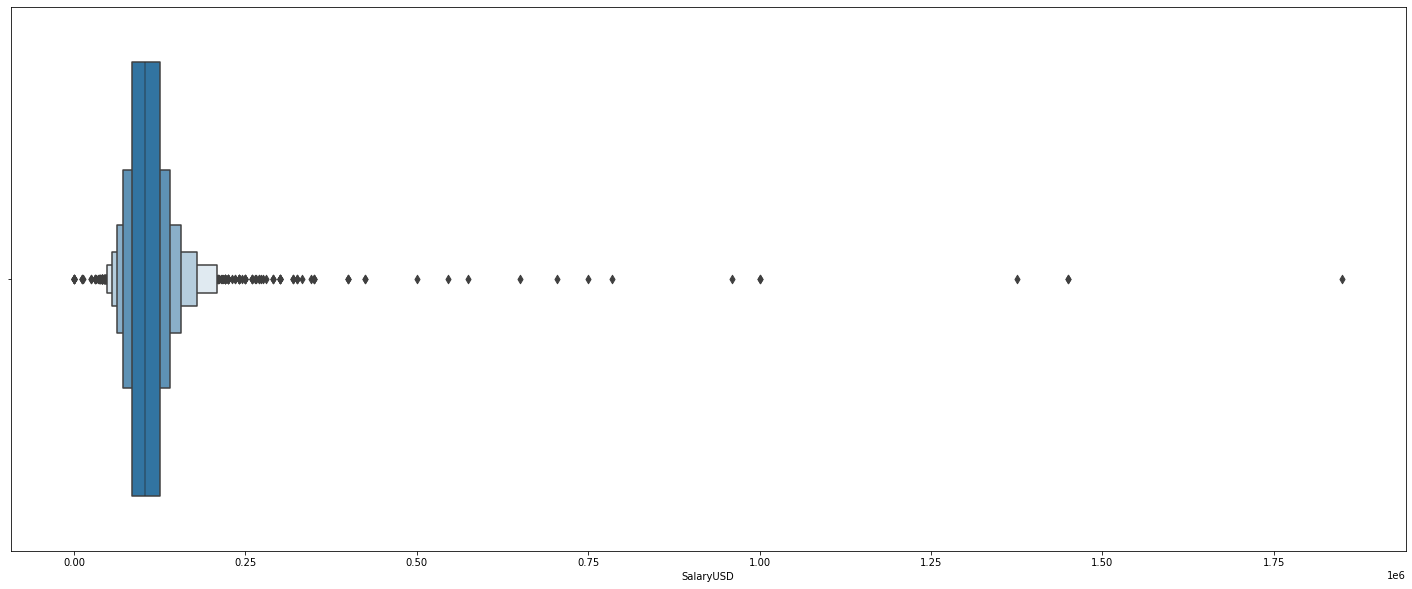

In [8]:
plt.figure(figsize=(25,10))

sns.boxenplot(x=excel_data["SalaryUSD"], k_depth="proportion", outlier_prop=0.05)

<AxesSubplot:xlabel='SalaryUSD', ylabel='JobTitle'>

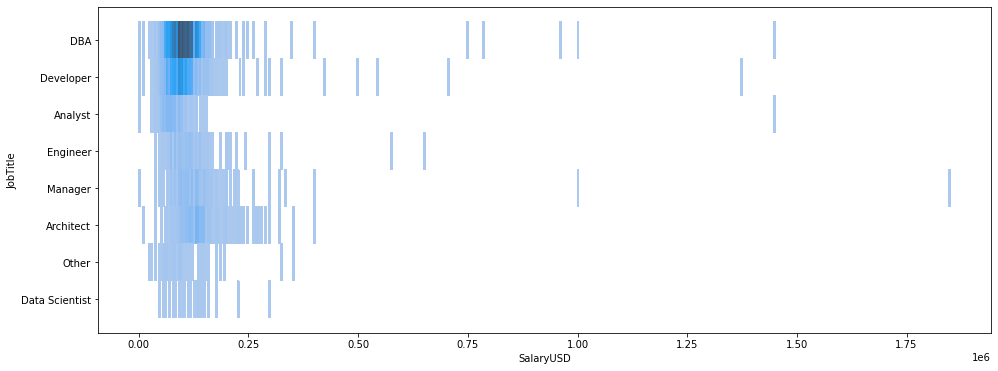

In [9]:
plt.figure(figsize=(16,6))

sns.histplot(data=excel_data, x='SalaryUSD', y='JobTitle')

### Salaire moyen en fonction du job title 

Le diagramme ci-dessous représente la moyenne de salaire en fonction du poste. Les lignes noires représentent un intervalle de confiance qui donne une indication sur la précision de cette moyenne.

<AxesSubplot:xlabel='SalaryUSD', ylabel='JobTitle'>

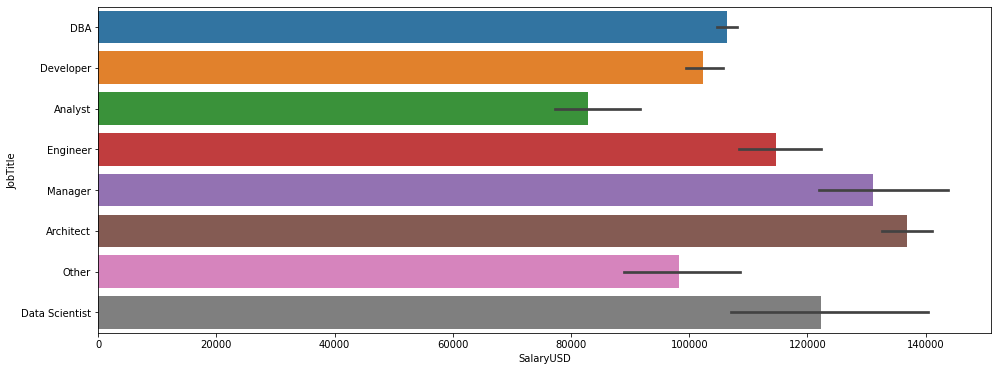

In [10]:
plt.figure(figsize=(16,6))

sns.barplot(data=excel_data, x='SalaryUSD', y='JobTitle')

### Diagramme circulaire de la répartitions de ses jobtitles

Sur le camembert ci-dessous est représentée la répartition des postes dans notre étude, nous constatons que la moitié des personnes sont des administrateurs de bases de données (DBA), et il y a très peu de data scientists. Ceci explique la précision évoquée dans le diagramme précédent.

<AxesSubplot:ylabel='JobTitle'>

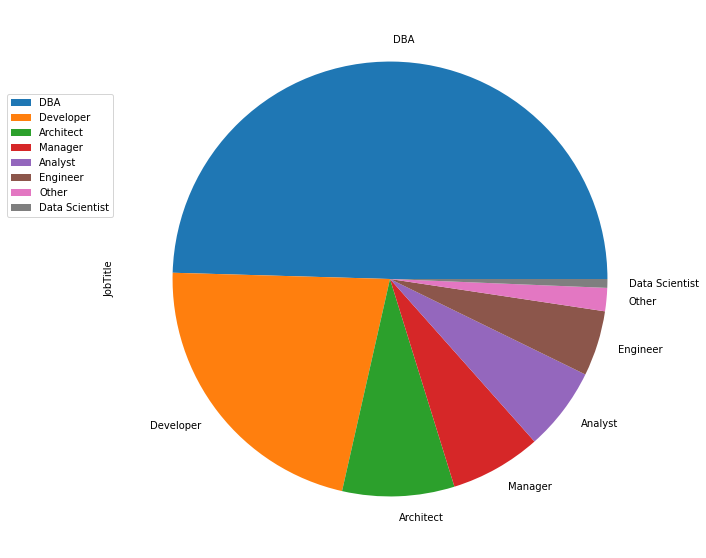

In [11]:

plt.figure(figsize=(16,10))

job_values = excel_data['JobTitle'].value_counts()
job_labels = excel_data['JobTitle'].value_counts().index
job_percent = excel_data['JobTitle'].value_counts().map(lambda f : f * 100 / excel_data['JobTitle'].size)



excel_pie = job_values.plot.pie()
plt.legend(job_labels, bbox_to_anchor=(0, 0.85), fontsize=10)
excel_pie

### Est-il préférable de travailler pour une seule ou plusieurs compagnies?

Le diagramme ci-dessous montre la différence de salaire en fonction du nombres d'entreprises ou les sondés ont travaillé, la colonne '1' représentant la moyenne de salaire pour un premier emploi.
Nous constatons que le salaire augmente en fonction du nombre d'entreprises.

<AxesSubplot:xlabel='HowManyCompanies'>

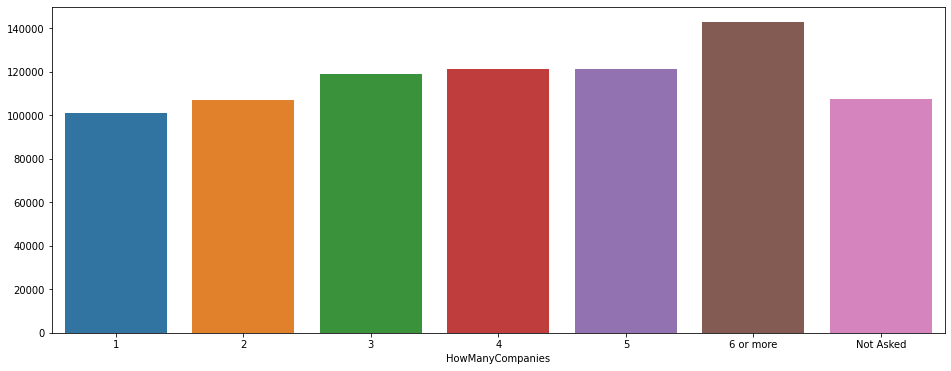

In [12]:
plt.figure(figsize=(16,6))
s = excel_data.groupby("HowManyCompanies")["SalaryUSD"].mean()

sns.barplot(x=s.index, y=s.values)

### Le nombre de personne dans son équipe a-t-il une influence sur votre salaire?


Le diagramme ci-dessous montre la moyenne des salaires en fonction de la taille des équipes.
Il ne montre pas de corrélation évidente.

<AxesSubplot:xlabel='OtherPeopleOnYourTeam'>

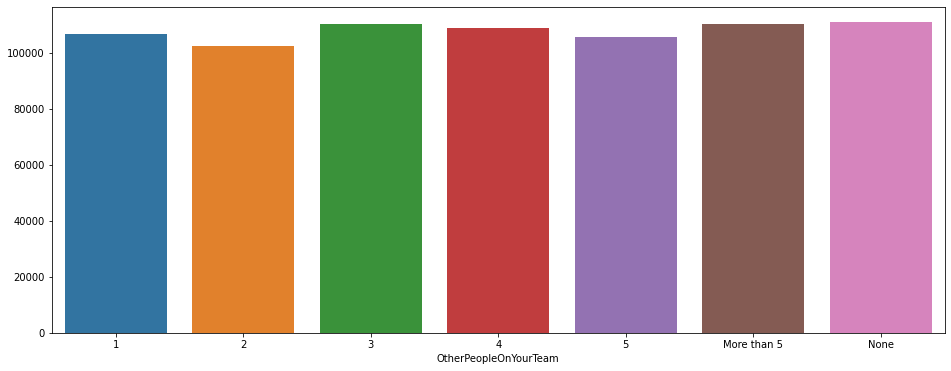

In [13]:
plt.figure(figsize=(16,6))
s = excel_data.groupby("OtherPeopleOnYourTeam")["SalaryUSD"].mean()

sns.barplot(x=s.index, y=s.values)